# Machine Learning Tools

## Scikit-Learn (Introduction to Scikit-Learn)

What we will be learning,
0. An end-to-end scikit-learn workflow
1. Standard imports
2. Getting the data ready
3. Identify & Choose the right __ML Algorithm(Model/Estimator)__ for our problem
4. Fit the __Model(ML Algorithm/Estimator)__ with training data and use it to make predictions
5. Evaluvate the __Model(ML Algorithm/Estimator)__
6. Improve the __Model(ML Algorithm/Estimator)__
7. Save and Load the trained __Model(ML Algorithm/Estimator)__
8. Putting it all together

In [1]:
what_we_are_covering =[
'0. An end-to-end scikit-learn workflow',
'1. Standard imports',
'2. Getting the data ready',
'3. Identify & Choose the right ML Algorithm(Model/Estimator) for our problem',
'4. Fit the Model(ML Algorithm/Estimator) with training data and use it to make predictions',
'5. Evaluvate the Model(ML Algorithm/Estimator)',
'6. Improve the Model(ML Algorithm/Estimator)',
'7. Save and Load the trained Model(ML Algorithm/Estimator)',
'8. Putting it all together']

what_we_are_covering

['0. An end-to-end scikit-learn workflow',
 '1. Standard imports',
 '2. Getting the data ready',
 '3. Identify & Choose the right ML Algorithm(Model/Estimator) for our problem',
 '4. Fit the Model(ML Algorithm/Estimator) with training data and use it to make predictions',
 '5. Evaluvate the Model(ML Algorithm/Estimator)',
 '6. Improve the Model(ML Algorithm/Estimator)',
 '7. Save and Load the trained Model(ML Algorithm/Estimator)',
 '8. Putting it all together']

### 0. Standard Imports

In [2]:
# import the stardard ususal libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

### 1. Getting the data ready

* There are three main things need to be done,
   1. split the data into features and labels (usually referes as'X' and 'y')
   2. Filling AKA imputing or removing missing values
   3. Converting non numerical values to numerical values (AKA __feature encoding__ )
   
* After that we should split the data into following test,
    1. \[70\% \(80\%\)\] Train
    2. \[15\%\] Validation (Optional)
    3. \[15\%\ \(20\%\)\]Test

In [3]:
# importing the heart-disease.csv
heart_disease = pd.read_csv('./data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Create X and y

# X -  means every other attributes(features) of the data frame except the attribute we want to check
# y - is the attribute(feature) we want to check
X = heart_disease.drop('target', axis=1)

y = heart_disease['target']

In [5]:
# No need of filling or discarding since no mising values
# No need of Feature encoding since all are numberical values

In [6]:
# this method from scikit Learning make splitting easier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # Splitting done

### 1.1 Converting everything to numerical data

In [7]:
# If we happened to have a data set with categorical data we have to convert them to numerical data otherwise our models 
# will not be able to understand that data

# so lets import car-sales-extended.csv
car_sales_extended = pd.read_csv('./data/car-sales-extended.csv')
car_sales_extended.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [8]:
# lets check data types
car_sales_extended.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [9]:
# See Make, Color are clearly strings not numerical
# and there is a sneaky one even though it is numerical that is Doors
car_sales_extended['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [10]:
# See it can be a categorical data too

# so we have to convert all three into numerical data

* __So in Pandas the offer an easy method which can do this but with little flexibility__


In [11]:
# but it cannot identify doors, because it is already numerical

dummy = pd.get_dummies(car_sales_extended)
dummy.head()

,Odometer (KM),Doors,Price,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,35431,4,15323,0,1,0,0,0,0,0,0,1
1,192714,5,19943,1,0,0,0,0,1,0,0,0
2,84714,4,28343,0,1,0,0,0,0,0,0,1
3,154365,4,13434,0,0,0,1,0,0,0,0,1
4,181577,3,14043,0,0,1,0,0,1,0,0,0


In [12]:
# Since there are 4 type of makes, It creates a seperate column for each type
# and if the row had a Make=Toyota.
# Make_Toyota column will be '1' and other will be '0'
# rest are also done as that

* __In scikit-learn we can do this more advanced manner, using `OneHotEncoder()`__

In [13]:
car_sales_extended.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [14]:
# Lets import relavent modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# First create a instance of OneHotencoder
one_hot = OneHotEncoder()


# and define an array with the fetures/attributes of the dataframe we want to be converted
categorical_features =['Make','Colour','Doors']

# Define a column transformer to transform the columns and combine everything
# what this says is transform the colums mentioned in 'categorical_fetures' using
# the transformer one_hot which is named as 'one_hot' let other columns passthrough and include in the final
transformer = ColumnTransformer(transformers=[('one_hot',one_hot,categorical_features)],remainder='passthrough')

# now that we have a transformer ready to transform all we have to do is give it the data
transformed_car_sales = transformer.fit_transform(car_sales_extended)

print(f'transformed_car_sales:\nLength: {len(transformed_car_sales)}\nDatatype: {transformed_car_sales.dtype}\nDimensions: {transformed_car_sales.ndim}\nShape: {transformed_car_sales.shape}')

# So column count has increased

transformed_car_sales:
Length: 1000
Datatype: float64
Dimensions: 2
Shape: (1000, 14)


In [15]:
# Lets put it into a dataframe and see
transformed_car_sales_df = pd.DataFrame(transformed_car_sales)
transformed_car_sales_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0


* This is what OneHotEncoding (Dummy encoding) Does,
<img alt='one-hot-encoding' src='./images/one-hot-encoding.png'>

### 1.2 What if our data has missing values
    
    1. We can either fill them (AKA Imputation)
    2. Remove every record with missing values

In [16]:
# first lest import missing value data
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [17]:
# Its always good to check to see if any missing values remain, use this method always

boolean_df =car_sales_missing.isna() # returns data frame with only boolean values for cells if NaN=true else false
boolean_df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [18]:
# count how many true values in each column
boolean_df.sum() # since True==1 there are 49 trues in column make it gives the sum as 49 thats what happen my dude...!!!

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [19]:
# we can do this to the previous dataset and see
car_sales_extended.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [20]:
# No missing values in there... Noice..!!! MAKE SURE TO DO THIS ALWAYS AFTER IMPORTING DATA

#### Filling Missing Data

<p style="color:red;font-weight:bold">IMPORTANT : Fill/transform the training set and test sets separately</p>

In [21]:
# Option 1 : Using Pandas

# filling Make values
car_sales_missing['Make'].fillna('missing',inplace=True)

# filling Colour Values
car_sales_missing['Colour'].fillna('missing',inplace=True)

# Filling Odometer (KM) values
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

# Filling Door values
car_sales_missing['Doors'].fillna(4,inplace=True) # since most of the cars has 4 doors

In [22]:
# Lets see if that has worked
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [23]:
# Naice it has worked, But wait there are still Price remain
# But we do not fill that since thats what we will be predicting, we will drop those values
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [24]:
len(car_sales_missing)
# Naice, it worked and we lost 50 datapoints along the way but thats okay

950

In [25]:
# Option 2 : Filling data with scikit-learn

# Before proceeding lets dvide our data and import
car_sales_missing =pd.read_csv('data/car-sales-extended-missing-data.csv')

#check
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [26]:
# Drop the price values with empty values
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [27]:
# Owkay we can see some overlayes rows has missed too
# Now we can split our data

X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [28]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [29]:
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [30]:
# check if these have missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [31]:
# Lets fill X missing values

#lets import a imputer from sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Creating imputers to change values these can be used to change values
categorical_imputer = SimpleImputer(strategy='constant', fill_value='missing')
doors_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer =SimpleImputer(strategy='mean')

transformer = ColumnTransformer(transformers=[('categorical_imputer', categorical_imputer,['Make','Colour']),
                                              ('doors_imputer', doors_imputer,['Doors']),
                                              ('num_imputer', num_imputer,['Odometer (KM)'])
                                             ])


In [32]:
# Now lets fit the data to transform

X_filled = transformer.fit_transform(X)

# since X_filled is a ndarray
X_filled_df = pd.DataFrame(X_filled, columns=['Make','Colour','Odometer (KM)','Doors'])
X_filled_df.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [33]:
# check X_filled_df
X_filled_df.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [34]:
# NOICE....!!!! It worked

#### Drop Missing Data altogether

* It's East just call `.dropna()` method on the imported dataframe

In [35]:
car_sales_missing = pd.read_csv('./data/car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
# lets drop missing data
car_sales_missing.dropna(inplace=True)
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
994,BMW,Blue,163322.0,3.0,31666.0
995,Toyota,Black,35820.0,4.0,32042.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [37]:
# See it works, but we have lost more than 200 dataset sample
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

## 3. Identify & Choose the right ML Algorithm(Model/Estimator) for our problem

Problem types we will be focusing here are supervised learning problems (problems that already has lables for data).

There are main two type as follows,

* Classification - predict whether something is what we hope or not
* Regression - predict a number

<a target='_blank' href="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html"><img href='#' alt='ML-Model-Map' src='./sklearn-ml-map.png'/></a>

#### 3.1 Picking a model for a regression problem

* Click the above image to go to official page and get documentation

In [38]:
# to make things easier we will import stuff again here
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [39]:
# Lets import the boston data set for the regression problem provided by scikit learn
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [40]:
# lets create a dataframe from this
housing_df = pd.DataFrame(data=housing['data'],columns=housing['feature_names'])

# add the target column
#housing_df['target'] = housing['target'] # <-- since housing has the same rows its okay 

# But better to use this code for safety
housing_df['target'] = pd.Series(housing['target'])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [41]:
# Boom it works

# lets see if it has any mising values
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [42]:
# Great No missing values

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [43]:
# Okay Lets see we have more than 50 samples (20K+)
# And we are not predicting a category 
# We are predicting a quatity -> Yes
# do we have less than 100K samples -> Yes
# Do you think few features will be important -> have no idea for the moment lets think all features are important

# Ding ding ding... So you have your model -> "Ridge Regression"

# import ridge regression model
from sklearn.linear_model import Ridge

In [44]:
from sklearn.model_selection import train_test_split

# lets split our data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 
# Set this randowm state if you are trying multiple sets otherwise splits will be different for each 

In [45]:
# now we are all set to train the model
model = Ridge()

# lets apply the traing data to the model
model.fit(X=X_train,y=y_train)

# Lets check the hows our model doing on test data now that it is trained
model.score(X=X_test,y=y_test)

0.5758549611440126

In [46]:
# Noice 57.58% Accuracy

* What if..? Ridge Regression is not working or
* we want see whether we can improve this score

In [47]:
# So map suggest randomforrestregressor
from sklearn.ensemble  import RandomForestRegressor

# Incetantiate the model
rf_model = RandomForestRegressor()

# lets split our data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 

# lets apply the traing data to the model
rf_model.fit(X=X_train,y=y_train)

# Lets check the hows our model doing on test data now that it is trained
rf_model.score(X=X_test,y=y_test)

0.8049648727750814

In [48]:
# BOOM and just like that from 57.58% to 80.62% Accuracy
# there is a little bit of randomness inside Randomtree model so slight chages happen to accuracy

#### 3.2 Picking a model for a classification problem

In [49]:
# lets import our heart disease dataset

heart_disease = pd.read_csv('./data/heart-disease.csv')

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
# lets see the deils
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [51]:
# lets check if any missing data is there
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [52]:
# Nope everything looks fine

# so lets walk throug the map

# Do we have more than 50 samples -> Yes
# are we predicting a category -> Yes
# do we have labeled data -> Yes
# less than 100K samples -> Yes

# Ding ding din.... Your model is -> 'Linear SVC'

# lets import the model
from sklearn.svm import LinearSVC

In [53]:
# set random seed
np.random.seed(42) # We can set this globally so we dont have to set it in model as well as in splitting

# that annoying change happen when only random_state was set on split funtion
# But when we look it was okay and gave same test train sets
# what has happend was the model also use a randome state it keep getting reset everytime

# inctantiate the model
lsvc_model = LinearSVC(max_iter=10000)

# split data into target and features
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Then split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# fit the train data to the model
lsvc_model.fit(X=X_train, y=y_train);

# Lets see how our model did
lsvc_model.score(X=X_test,y=y_test)

D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [54]:
# Wooo hooo 86.88% Accuracy... Noice

In [55]:
#lets see using RandomForrestClassifier
from sklearn.ensemble  import RandomForestClassifier


# set random seed
np.random.seed(42)

# inctantiate the model
rfc_model = RandomForestClassifier()

# split data into target and features
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']


# Then split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# fit the train data to the model
rfc_model.fit(X_train, y_train);

# Lets see how our model did
rfc_model.score(X=X_test,y=y_test)

0.8360655737704918

In [56]:
# this has 83.60% accuracy but it seems earlier model was goodS

### 4. Fit the Model(ML Algorithm/Estimator) with training data and use it to make predictions

#### 4.1 Fit the Model(ML Algorithm/Estimator) with training data

* `X` - Features, Feature variables, data
* `y` - Labels, target variables, targets

In [57]:
#lets see using RandomForrestClassifier
from sklearn.ensemble  import RandomForestClassifier

# set random seed
np.random.seed(42)

# inctantiate the model
rfc_model = RandomForestClassifier()

# split data into target and features
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']


# Then split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#============================================================================================

# fit the train data to the model
rfc_model.fit(X_train, y_train);

# What this does is that it will take test data and go through the features and look at the 
# corresponding label in try to figure out combinations of features that give which label
# And use those patterns to predict new values

#============================================================================================


# Lets see how our model did
rfc_model.score(X=X_test,y=y_test)

0.8360655737704918

### Random Forest model deep dive
These resources will help you understand what's happening inside the Random Forest models we've been using,

* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest),
* [Random Forest Wikipedia (simple version)](https://simple.wikipedia.org/wiki/Random_forest),
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat,
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen
   

#### 4.2 Use the trained model to make predictions

There are two main ways,
   1. using `predict()`
   2. using `predict_proba()`

In [58]:
# using predict() gives us the prediction values that our model gives
y_pred = rfc_model.predict(X=X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [59]:
# lets see the actual ylabes we had in y_test
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [60]:
# So we can compare these two as follows
np.array(y_pred==y_test) # so what we are doing is getting the mean of this comparison array mean of all the 1's

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [61]:
np.mean(y_pred==y_test)

0.8360655737704918

In [62]:
rfc_model.score(X=X_test,y=y_test)

0.8360655737704918

In [63]:
# both gives the same answer... I mean they should be thats what score function do compare the results

Make predictions with `predict_proba()`

In [64]:
X_test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [65]:
# Predict_proba() will give the probability of each label

rfc_model.predict_proba(X=X_test[:5])

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79]])

In [66]:
# what this gives is that since there are only two labels
# for the first data row model is 95% confident that it is a 0 and 5% confident that it will be a 1
# Likewise for thr others

In [67]:
# But what predic() does is fore to give the label depending on which has the most probability

rfc_model.predict(X=X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [68]:
# See
# why use predict_proba() then,
# well we can see the thirs one which is 45% for 0 and 55% for 1 its basically a 50:50 
# why it has happen we dont want that kind of confidence prediction
# even we can tell something like that

# so the point of predict_proba is that you can decide whether to force to give label for certain threshold values
# or look at data sets where model got confused and look ways to improve

#### Can we use `predict()` in regression problems..?

In [69]:
# Answer is yes

# lets see our random forest model for regression
from sklearn.ensemble  import RandomForestRegressor

# set randome sate globally
np.random.seed(42)

# Incetantiate the model
rf_model = RandomForestRegressor()

# lets split our data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 

# lets apply the traing data to the model
rf_model.fit(X=X_train,y=y_train)

# Lets check the hows our model doing on test data now that it is trained
rf_model.score(X=X_test,y=y_test)

0.8051230593157366

In [70]:
# lets look at y_test
y_test[:5]

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: target, dtype: float64

In [71]:
# get y_pred...hopefully?
y_pred =rf_model.predict(X=X_test)
y_pred[:5]

array([0.5095   , 0.74161  , 4.9232571, 2.52961  , 2.27369  ])

In [72]:
# Unlike in the clasification case, this time predict give the actual prediction values

# we can see how far each of the are from the real value and get a mean of those errors (mean absolute error)
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred)

0.32754256845930246

In [73]:
# so it says it will be either +/0.33 away from real values 
# that looks good I would say

# We cannot use .predict_proba() because it aonly works for classifications

### 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
        
   1. Estimator's built-in `score()` method
   2. The `scoring` parameter
   3. Problem-specific metric functions
    
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

#### 4.1 Evaluating a model with the `score` method

In [74]:
# lets see our random forest model for regression
from sklearn.ensemble  import RandomForestRegressor

# set randome sate globally
np.random.seed(42)

# Incetantiate the model
rf_model = RandomForestRegressor()

# lets split our data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 

# lets apply the traing data to the model
rf_model.fit(X=X_train,y=y_train);

Using `.score()` on regression model

In [75]:
# Lets check the hows our model doing on test data now that it is trained
rf_model.score(X=X_test,y=y_test)

0.8051230593157366

Using `.score()` on classification model

In [76]:
from sklearn.ensemble  import RandomForestClassifier

# set random seed
np.random.seed(42)

# inctantiate the model
rfc_model = RandomForestClassifier()

# split data into target and features
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']


# Then split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# fit the train data to the model
rfc_model.fit(X_train, y_train);

In [77]:
# Lets see how our model did
rfc_model.score(X=X_test,y=y_test)

0.8360655737704918

In [78]:
# However the mechanism they use to predict score are different depending on their type

#### 4.2 Evaluating a model using the `scoring` parameter

In [79]:
# first of all lets import cross_val_score()
from sklearn.model_selection import cross_val_score

from sklearn.ensemble  import RandomForestClassifier

# set random seed
np.random.seed(42)

# inctantiate the model
rfc_model = RandomForestClassifier()

# split data into target and features
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']


# Then split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# fit the train data to the model
rfc_model.fit(X_train, y_train);

# Use score() method
rfc_model.score(X_test,y_test)

0.8360655737704918

In [80]:
# lets see what cross_val_score() gives us
cross_val_score(rfc_model,X,y,cv=5)
# cv can be anything it just stands for 5 since we mentioned as five so it will do 5 splits

array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.75      ])

In [81]:
# What does this array mean
# Look at the below figure so you will understand

<img src='./images/cross-validation-score.png' alt='cross validation method working'/>

In [82]:
# if we take a mean value of the cross validation list we can have a mean value of accuracy

print(f'normal score: {rfc_model.score(X_test,y_test)}\navg of cross validation: {np.mean(cross_val_score(rfc_model,X,y,cv=5))}')

normal score: 0.8360655737704918
avg of cross validation: 0.8281420765027322


In [83]:
# though it is lower than normal score we can take that as a fair accuracy


# So what does everything has to do with scoring parameter
# if you see the details of the cross_val_score() you can see there is a score parameter which is set to 'None'
# which means it will use the default scoring method use by the model if not specified otherwise

Those are, 

* in Regression - __coefficient of determination__
* in Classifiers - __mean accuracy__

### 4.2.1 Classification model evaluation metrics

   1. Accuracy
   2. Area under ROC curve
   3. Confusion matrix
   4. Classification report

**1. Accuracy**

In [84]:
# first of all lets import cross_val_score()
from sklearn.model_selection import cross_val_score

from sklearn.ensemble  import RandomForestClassifier

# set random seed
np.random.seed(42)

# inctantiate the model
rfc_model = RandomForestClassifier()

# split data into target and features
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# lets take the cross_val_score
cross_validation_scores = cross_val_score(rfc_model,X,y,cv=5)
cross_validation_scores

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [85]:
# So the accuracy is the averge of those numbers
print(f'Accuracy of the Cross-Validation is : {np.mean(cross_validation_scores) *100 :.2f}%')

Accuracy of the Cross-Validation is : 82.48%


__2. Area under ROC curve__

ROC (Receiver Operating Characteristic) curves are a comparison of a model's true postive rate (tpr)\[__Sensitivity__\] versus a models false positive rate (fpr).

   * True positive = model predicts 1 when truth is 1
   * False positive = model predicts 1 when truth is 0
   * True negative = model predicts 0 when truth is 0
   * False negative = model predicts 0 when truth is 1
   
<img alt="Confision matrix definitions" src='./images/table-true-pos-neg.png'/>

<img alt="tpr-fpr-table" src='./images/metric-definition.png'/>

In [86]:
# and to refresh lets just do our hear disease model from start

In [87]:
# Import important libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# lets import ROC curve  
from sklearn.metrics import roc_curve

In [88]:
# Import the data
data_df = pd.read_csv('./data/heart-disease.csv')
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
# check if any missing values
data_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [90]:
# no missing values very good, Lets check details of data set
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [91]:
# All numerical we dont have to convert good

# and we have more than 50 samples > yes
# we are looking for a label > yes
# We have labels > yes
# So we will use "Random forrest classifier for this"
from sklearn.ensemble import RandomForestClassifier

# set a random seed globally
np.random.seed(42)

# then devide the data into features and targets
X = data_df.drop('target', axis=1)
y = data_df['target']

# then we can split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

# get a model instance
rfc_model =RandomForestClassifier()

# fit the data to the model
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [92]:
# Okay Okay lets do this

#So since we are interested about True Positive Rate
# we need all the probabilities of label true
# whether what our model has given so lets use our trusty .predict_proba()

# yes we can use it since this is a classifier problem
y_pred = rfc_model.predict_proba(X_test)

y_pred[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [93]:
# wee need all the positive probabilities (Values at index 1 of each nested list dummies)
y_positive_probabilities = y_pred[:,1:]

# we also have the real scenario on y_test whether real situation is 1 or 0

# now lets calculate fpr,tpr and thresholds
fpr,tpr,threshold = roc_curve(y_true=y_test,y_score=y_positive_probabilities)

# check false positive rate (actual case is 0 but model predict as havinghigher prob for as 1)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [94]:
# lets create a function to plot fpr,tpr rates

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and,
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()



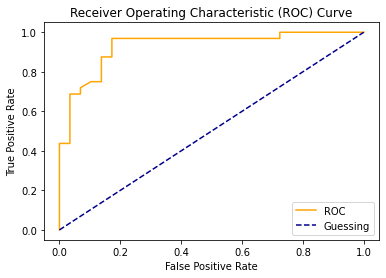

In [95]:
plot_roc_curve(fpr,tpr);

In [96]:
# Lets see the area under this ROC curve
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true=y_test, y_score=y_positive_probabilities)

0.9304956896551724

In [97]:
# Perfect ROC curve
fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_test)

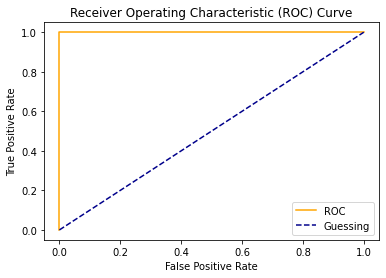

In [98]:
# lets plot the ROC curve
plot_roc_curve(fpr,tpr)

In [99]:
# the maximum can get is 1.0
roc_auc_score(y_true=y_test, y_score=y_test)

1.0

__3. Confusion Matric__

A confusion metrix is a quick way to you to see the labels model predicted vs labels it should have really predicted.

Giving you a idea about where the model got confused the most

In [100]:
# lets import confusion matrix 
from sklearn.metrics import confusion_matrix

# okay lets get some predict values using our model
y_pred = rfc_model.predict(X=X_test)

confusion_mat = confusion_matrix(y_true=y_test,y_pred=y_pred)
confusion_mat

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [101]:
# lets put this in a cross tab for wasiness
pd.crosstab(index=y_test, columns=y_pred, colnames=['Prediction'],rownames=['Actual'])

Prediction,0,1
Actual,,
0,24,5
1,4,28


<img alt="confusion matrix anatomy" src="./images/confusion-matrix-anatomy.png"/>

<AxesSubplot:>

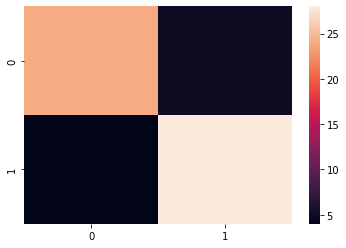

In [102]:
# We can visualize this better by seaborn heatmaps
import seaborn as sbn

sbn.heatmap(confusion_mat)

In [103]:
# hmmm module not found
# Thats right because we did not isntall seaborn in our env
# So what we can do is open another terminal and install seaborn or
# We can run the below code and run the above code again
# What it will do is it will let us run bash commands withing jupyter notebook

In [104]:
#import sys
#!conda install --yes --prefix {sys.prefix} seaborn

# This should work but it didnt and im just lazy to debug
#instead I installed using terminal.. HEHE


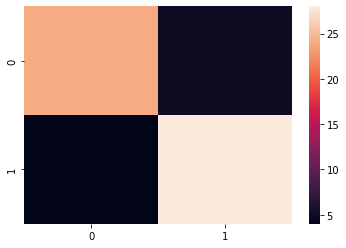

In [105]:
# We can visualize this better by seaborn heatmaps
import seaborn as sbn

sbn.heatmap(confusion_mat);

In [106]:
# Lets create a function and try to customize this
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sbn.heatmap(conf_mat,
    annot=True, # Annotate the boxes with conf_mat info
    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

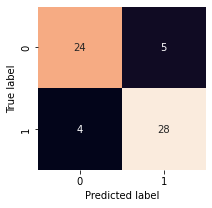

In [107]:
plot_conf_mat(confusion_mat)

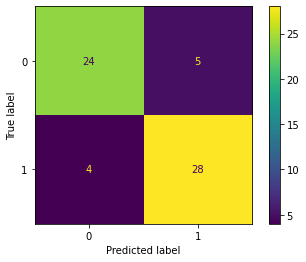

In [108]:
# why we did not use sklearn isnt there a way
# there is lets try
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_mat)
disp.plot();

# Wooow this is way more easier than that stupid seaborn way 

__3. Classification report__

Sort of give a summary of what we did above as a report

<img alt="anatomy-of-classification-report" src="./images/anatomy-of-classification-report.png" />

In [109]:
# So lets see
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [110]:
# so why cant we just use accuracy

# well lets see
y_test = np.zeros(1000)

# and only one of them had heart disease
y_test[42]=1

# then lets build a prediction where model predict none of them has disease
y_pred =np.zeros(1000)

# then lets try the classification report
print(classification_report(y_true=y_test, y_pred=y_pred,zero_division=1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       999
         1.0       1.00      0.00      0.00         1

    accuracy                           1.00      1000
   macro avg       1.00      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



In [111]:
# See even though accuracy is 100% we know that our model failed

To summarize classification metrics:

   * **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
   * **Precision** and **recall** become more important when classes are imbalanced.
   * If false positive predictions are worse than false negatives, aim for higher precision.
   * If false negative predictions are worse than false positives, aim for higher recall
   * **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

   1. R^2 (pronounced r-squared) or the coefficient of determination
   2. Mean absolute error (MAE) 
   3. Mean squared error (MSE)

**1. R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.  For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [112]:
# Okay Im lazy and its way past 10 so im gonna copy and paste the regression problem

# lets see our random forest model for regression
from sklearn.ensemble  import RandomForestRegressor

# set randome sate globally
np.random.seed(42)

# Incetantiate the model
rf_model = RandomForestRegressor()

# lets split our data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 

# lets apply the traing data to the model
rf_model.fit(X=X_train,y=y_train);

In [113]:
# lets use .score() which by default give the score using R^2 method
rf_model.score(X_test,y_test)

0.8051230593157366

In [114]:
# so according to "our definition"
# if our model predict every value to be a mean then R^2 will be zeros


# first of all lets import R2 Score function
from sklearn.metrics import r2_score

# lets check that out
y_pred_mean = np.full(len(y_test),fill_value=np.mean(y_test))

# okat lets test the socre with these values
r2_score(y_true=y_test,y_pred=y_pred_mean)

0.0

In [115]:
# Ahhhh naice

# then what happens if it predict everything correctly
r2_score(y_true=y_test,y_pred=y_test)

1.0

In [116]:
# beautiful... NOICE!!!

**2. Mean Absolute Error (MAE)**

What MAE does is, it will take the absolute diffrences (negatives are turned to positive, because we want to how far off values are from real values) and take the average of that.

In [117]:
# lets import 
from sklearn.metrics import mean_absolute_error

y_pred = rf_model.predict(X_test)

# lets see the MAE of the above dataset
mean_absolute_error(y_true=y_test,y_pred=y_pred)

0.32754256845930246

In [118]:
# so lets see this visually

df = pd.DataFrame({
    "Actual Values":y_test,
    "Predicted Values":y_pred
})

df.head()

,Actual Values,Predicted Values
20046,0.47700,0.509500
3024,0.45800,0.741610
15663,5.00001,4.923257
20484,2.18600,2.529610
9814,2.78000,2.273690


In [119]:
# Okay to make things clear lets add another column
df['Difference'] = df['Predicted Values']-df['Actual Values']
df.head(10)

,Actual Values,Predicted Values,Difference
20046,0.47700,0.509500,0.032500
3024,0.45800,0.741610,0.283610
15663,5.00001,4.923257,-0.076753
20484,2.18600,2.529610,0.343610
9814,2.78000,2.273690,-0.506310
13311,1.58700,1.646920,0.059920
7113,1.98200,2.376050,0.394050
7668,1.57500,1.669320,0.094320
18246,3.40000,2.772971,-0.627029
5723,4.46600,4.913459,0.447459


In [120]:
# so now lest turn them to abs values
df['Difference (ABS)'] = df['Difference'].abs()
df.head(10)

,Actual Values,Predicted Values,Difference,Difference (ABS)
20046,0.47700,0.509500,0.032500,0.032500
3024,0.45800,0.741610,0.283610,0.283610
15663,5.00001,4.923257,-0.076753,0.076753
20484,2.18600,2.529610,0.343610,0.343610
9814,2.78000,2.273690,-0.506310,0.506310
13311,1.58700,1.646920,0.059920,0.059920
7113,1.98200,2.376050,0.394050,0.394050
7668,1.57500,1.669320,0.094320,0.094320
18246,3.40000,2.772971,-0.627029,0.627029
5723,4.46600,4.913459,0.447459,0.447459


In [121]:
# now then take the mean
df['Difference (ABS)'].mean() , mean_absolute_error(y_test,y_pred)

(0.3275425684593016, 0.32754256845930246)

In [122]:
# numbers are same for 14 decimal places
# rest change because of the mean(), but we can take mean_absolute_error() is correct because it does not do any rounding

**3. Mean Squared Errorv (MSE)**

What MSE does is, it will take the Squre values of diffrences and take the average of that.

In [123]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true=y_test,y_pred=y_pred)

0.2553684927247781

In [124]:
# lets try recreating this using above dataframe
df['Difference (Sqrd)'] = np.square(df['Difference'])
df.head(10)

,Actual Values,Predicted Values,Difference,Difference (ABS),Difference (Sqrd)
20046,0.47700,0.509500,0.032500,0.032500,0.001056
3024,0.45800,0.741610,0.283610,0.283610,0.080435
15663,5.00001,4.923257,-0.076753,0.076753,0.005891
20484,2.18600,2.529610,0.343610,0.343610,0.118068
9814,2.78000,2.273690,-0.506310,0.506310,0.256350
13311,1.58700,1.646920,0.059920,0.059920,0.003590
7113,1.98200,2.376050,0.394050,0.394050,0.155275
7668,1.57500,1.669320,0.094320,0.094320,0.008896
18246,3.40000,2.772971,-0.627029,0.627029,0.393166
5723,4.46600,4.913459,0.447459,0.447459,0.200219


In [125]:
0.032500**2

0.0010562500000000001

In [126]:
# values seems to be correct lest check the mean
df['Difference (Sqrd)'].mean(), mean_squared_error(y_true=y_test,y_pred=y_pred)

(0.255368492724778, 0.2553684927247781)

In [127]:
# same Nice

<img alt="regression good evaluvation" src="./images/regression-what-is-good-evaluvation.png"/>

__TIP :__ What you want to do is ,
   * Minimize MAE
   * Minimize MSE
   * And Finally Maximize R2 Score

<p>For more resources on evaluating a machine learning model, be sure to check out the following resources:</p><ul><li><p><a href="https://scikit-learn.org/stable/modules/model_evaluation.html" rel="noopener noreferrer" target="_blank">Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)</a></p></li><li><p><a href="https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c" rel="noopener noreferrer" target="_blank">Beyond Accuracy: Precision and Recall by Will Koehrsen</a></p></li><li><p><a href="https://stackoverflow.com/a/37861832" rel="noopener noreferrer" target="_blank">Stack Overflow answer describing MSE (mean squared error) and RSME&nbsp;(root mean squared error)</a></p></li></ul>

### 4.2 Evaluating a model with the `scoring` parameter

__4.2.1 Classification Model__

In [128]:
# So we will use "Random forrest classifier for this"
from sklearn.ensemble import RandomForestClassifier

# import heart disease
data_df = pd.read_csv('./data/heart-disease.csv')

# set a random seed globally
np.random.seed(42)

# then devide the data into features and targets
X = data_df.drop('target', axis=1)
y = data_df['target']

# then we can split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

# get a model instance
rfc_model =RandomForestClassifier()

# fit the data to the model
rfc_model.fit(X_train,y_train);

In [129]:
# set a random seed globally
np.random.seed(42)

rfc_model.score(X_test,y_test)

0.8524590163934426

In [130]:
np.random.seed(42)
cv_acc = cross_val_score(rfc_model, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [131]:
# We've seen this before, now we got 5 different accuracy scores on different test splits of the data.

In [132]:
# Averaging this gives the cross-validated accuracy

In [133]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [134]:
# Since we have not changed the scoring parameter in cross_val_score()
# it will use the default method defined by the model

# We can find the same using the `scoring` parameter and passing it "accuracy"

In [135]:
np.random.seed(42)
cv_acc = cross_val_score(rfc_model, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


The same goes for the other metrics we've been using for classification.

   Let's try `"precision"`.

In [136]:
np.random.seed(42)
cv_precision = cross_val_score(rfc_model, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision)*100:.2f}%")

The cross-validated precision is: 83.30%


How about `"recall"`?

In [137]:
np.random.seed(42)
cv_recall = cross_val_score(rfc_model, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%")

The cross-validated recall is: 85.45%


And `"f1"` (for F1 score)?

In [138]:
np.random.seed(42)
cv_f1 = cross_val_score(rfc_model, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1)*100:.2f}%")

The cross-validated F1 score is: 84.27%


We can repeat this process with our regression metrics.

Let's revisit our regression model.

In [139]:
# lets see our random forest model for regression
from sklearn.ensemble  import RandomForestRegressor

# set randome sate globally
np.random.seed(42)

# Incetantiate the model
rf_model = RandomForestRegressor()

# lets split our data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 

# lets apply the traing data to the model
rf_model.fit(X=X_train,y=y_train);

In [140]:
rf_model.score(X_test,y_test)

0.8051230593157366

In [141]:
# default is R2 Method

But we can use `"neg_mean_absolute_error"` for MAE (mean absolute error).

In [142]:
np.random.seed(42)
cv_mae = cross_val_score(rf_model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE score is: {np.mean(cv_mae):.2f}")

The cross-validated MAE score is: -0.47


In [143]:
np.random.seed(42)
cv_mse = cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}")

The cross-validated MSE score is: -0.56


### 4.3 Using different evaluation metrics with Scikit-Learn

Remember the third way of evaluating Scikit-Learn functions?

3. Problem-specific metric functions.

Similar to how the `scoring` parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions

Well, we've kind of covered this third way of using evaulation metrics with Scikit-Learn.

In essence, all of the metrics we've seen previously have their own function in Scikit-Learn.

They all work by comparing an array of predictions, usually called `y_preds` to an array of actual labels, usually called `y_test` or `y_true`.


#### Classification functions

For:
   * Accuracy we can use [`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
   * Precision we can use [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
   * Recall we can use [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
   * F1 we can use [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

## 5.  Improving model predictions through experimentation (hyperparameter tuning)

The first predictions you make with a model are generally referred to as baseline predictions. The same goes with the first evaluation metrics you get. These are generally referred to as baseline metrics.

Your next goal is to improve upon these baseline metrics.

Two of the main methods to improve baseline metrics are from a data perspective and a model perspective.

From a data perspective asks:
   * Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
   * Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.
    
From a model perspective asks:
   * Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), ensemble methods are generally considered more complex models)
   * Could we improve the current model? If the model you're using performs well straight out of the box, can the **hyperparameters** be tuned to make it even better?

Hyperparameters vs. Parameters
   * Parameters = model find these patterns in data
   * Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns
   
Three ways to adjust hyperparameters:
   1. By hand
   2. Randomly with RandomSearchCV
   3. Exhaustively with GridSearchCV

   **Note:** Patterns in data are also often referred to as data parameters. The difference between parameters and hyperparameters is a machine learning model seeks to find parameters in data on its own, where as, hyperparameters are settings on a model which a user (you) can adjust.

### 5.1 Tuning hyperparameters by hand

In [144]:
# Okay its a new daya and lets get rolling

# start the day by doing a classification shall we?

# lets go throught the process

# first of all import the modules
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

# Now the data
hrt_data = pd.read_csv('./data/heart-disease.csv')

# check the data for any missing values
hrt_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [145]:
# no missing data so lets check details
hrt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [146]:
# all numerical data no cleaning, or anything need to be done

# then we can go throught that map
# but we going to use RandomForrestClassifier, So....

from sklearn.ensemble import RandomForestClassifier

# Setting random seed
np.random.seed(42)

# So lets instanciate this model
clf_baseline = RandomForestClassifier()

# So this baseline model is set with default parameters (hyper parameters)

# we can see them by
clf_baseline.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [147]:
# So we can manually tune this and see if our model get improved

# so unlike in the previous work we have to now split the dataset into 3 parts train, validate, test

# because we have to validate and tune it before testing for real

# and yes we cannot use train_test_split

# Well dont let that stop you

# lets shuffle the data
hrt_data_shuffled = hrt_data.sample(frac=1.0)

hrt_data_shuffled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [152]:
# now devide it to X and y
X = hrt_data_shuffled.drop('target', axis=1)
y = hrt_data_shuffled['target']

# now lets determine the indeces we ned to split data
last_train_indx = round(0.7*len(X)) # since we might get decimals we have to use round()
last_valid_indx = round(last_train_indx+0.15*len(X))

# okay now we can use slicing to split
X_train = X[:last_train_indx] # from index 0 - last train index
y_train = y[:last_train_indx]

# now the valid and test sets

X_valid, y_valid = X[last_train_indx:last_valid_indx], y[last_train_indx:last_valid_indx]

X_test, y_test = X[last_valid_indx:], y[last_valid_indx:]

# lets check
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [154]:
# Naice its working but...
# thats a lot of code and we might need to reuse it, lets make a function out it shall we?

def train_valid_test_split(X,y):# i know name is very original
    """
    Split the data into Train, Validation & Test sets when X & y are passed to it
    """
    
    last_train_indx = round(0.7*len(X)) # since we might get decimals we have to use round()
    last_valid_indx = round(last_train_indx+0.15*len(X))

    X_train = X[:last_train_indx]
    y_train = y[:last_train_indx]

    X_valid, y_valid = X[last_train_indx:last_valid_indx], y[last_train_indx:last_valid_indx]

    X_test, y_test = X[last_valid_indx:], y[last_valid_indx:]
    
    return X_train, X_valid, X_test, y_train, y_valid, y_test

X_train1, X_valid1, X_test1, y_train, y_valid, y_test = train_valid_test_split(X,y)

# check, the moment of truth
len(X_train1), len(X_valid1), len(X_test1)

(212, 45, 46)

In [155]:
# So its working woohoo

In [161]:
# okay now for the model
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)

clf_base = RandomForestClassifier()

# now fit the data
clf_base.fit(X_train,y_train)

# Now lets get the prediction using validation sets
y_pred_on_valid = clf_base.predict(X_valid)

# now lets check some classificaton model evaluvation matrices

# import Accuracy, Precision, Recall, F1
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_true=y_valid,y_pred=y_pred_on_valid)
precision = precision_score(y_true=y_valid,y_pred=y_pred_on_valid)
recall = recall_score(y_true=y_valid,y_pred=y_pred_on_valid)
f1 = f1_score(y_true=y_valid,y_pred=y_pred_on_valid)

print(f"Accuracy Score : {accuracy:.2f}")
print(f"Precision Score : {precision:.2f}")
print(f"Recall Score : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")

Accuracy Score : 0.82
Precision Score : 0.84
Recall Score : 0.84
F1 Score : 0.84


In [190]:
# this is working but we maybe use this again and again as well since we have to check it after tuning the model
def get_classification_scores(y_true,y_valid):
    """
    Returns the accuracy_score,precision_score,recall_score,f1_score
    """
    accuracy = accuracy_score(y_true=y_true,y_pred=y_valid)
    precision = precision_score(y_true=y_true,y_pred=y_valid)
    recall = recall_score(y_true=y_true,y_pred=y_valid)
    f1 = f1_score(y_true=y_true,y_pred=y_valid)

    print(f"Accuracy Score : {accuracy:.2f}")
    print(f"Precision Score : {precision:.2f}")
    print(f"Recall Score : {recall:.2f}")
    print(f"F1 Score : {f1:.2f}")
    
    return {"Accuracy":accuracy,"Precision":precision,"Recall":recall,"F!":f1}

In [192]:
# lets check
base_scores =get_classification_scores(y_valid,y_pred_on_valid)

Accuracy Score : 0.82
Precision Score : 0.84
Recall Score : 0.84
F1 Score : 0.84


In [193]:
# Naice So these are the score of our baseline model

clf_base.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We will try to change following parameters by hand and see what happens,
   * `max_depth`
   * `max_features`
   * `min_samples_leaf`
   * `min_samples_split`

In [194]:
np.random.seed(42)

# so lets 
clf_1 = RandomForestClassifier(max_depth=10)

clf_1.fit(X_train,y_train)

y_pred_on_valid_1 = clf_1.predict(X_valid)

# check scores
by_hand_scores =get_classification_scores(y_valid,y_pred_on_valid_1)

Accuracy Score : 0.91
Precision Score : 0.92
Recall Score : 0.92
F1 Score : 0.92


In [174]:
# so yeah you get the drill we have to do it ans see
# AHHHHHHH STRESSS

# Don't worry there is a built in method scikit-learn which do this for us

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [176]:
# Lets import RandomizedSerchCV
from sklearn.model_selection import RandomizedSearchCV

# what this will do is cross validate and loop through the different combinations of the 
# parameters we set

# parameter set
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# set up a global seed so our output is reproducable
np.random.seed(42)

# Split into X & y
X = hrt_data_shuffled.drop("target", axis=1)
y = hrt_data_shuffled["target"]

# in this case we dont need valid set because cross validation happend behind the seens

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # n_jobs mean how much process alocation we give

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None,

D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.2s


In [178]:
# after this has run
# we can get the most suited parameters that this algorithm found as follows

rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [195]:
# so now we can set these parameters and check if our score has changed

clf_2 =RandomForestClassifier(n_estimators=200,min_samples_split=6,min_samples_leaf=2,max_features='sqrt',max_depth=None)

# or we can directly use the rs_clf since its loaded with best params
clf_2.fit(X_train, y_train)

y_tune_pred =clf_2.predict(X_test)

randomized_cv_scores=get_classification_scores(y_test,y_tune_pred)

Accuracy Score : 0.84
Precision Score : 0.78
Recall Score : 0.89
F1 Score : 0.83


Some have improved some have not

If we want we can change the number of iterations and check, and so on

### 5.3 Hyperparameter tuning with GridSearchCV

So what this is, unlike the randomized one, this goes through all the possible combinations of parameter we give it

In [196]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [197]:
# lets see if there are how many combinations
6*5*2*3*3

540

In [198]:
# and 5 times of that becaise of the cross validation
6*5*2*3*3*5

2700

In [199]:
# Thats a lot and laptop cannot handle that much

What we can do is reduce the combinations by looking at the best parames of randomize one and getting rid of some things

In [200]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [201]:
grid_2 = {'n_estimators': [100, 200, 500],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [4, 6],
 'min_samples_leaf': [2, 4]}

In [202]:
# now we have combinations
3*1*2*2*2*5

120

In [189]:
# Which is okay

# so lets try
from sklearn.model_selection import GridSearchCV, train_test_split 

# set up a global seed so our output is reproducable
np.random.seed(42)

# Split into X & y
X = hrt_data_shuffled.drop("target", axis=1)
y = hrt_data_shuffled["target"]

# in this case we dont need valid set because cross validation happend behind the seens

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # n_jobs mean how much process alocation we give

# Setup GridSearchCV
grid_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2, 
                            cv=5,
                            verbose=2)

# Fit the GridSearchCV version of clf
grid_clf.fit(X_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.7s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.8s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.7s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.7s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None,

In [203]:
grid_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 200}

In [204]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [205]:
# okay only slight change
y_grid_tune_pred = grid_clf.predict(X_test)
# lets get grid scores
grid_cv_scores = get_classification_scores(y_test,y_grid_tune_pred)

Accuracy Score : 0.82
Precision Score : 0.76
Recall Score : 0.89
F1 Score : 0.82


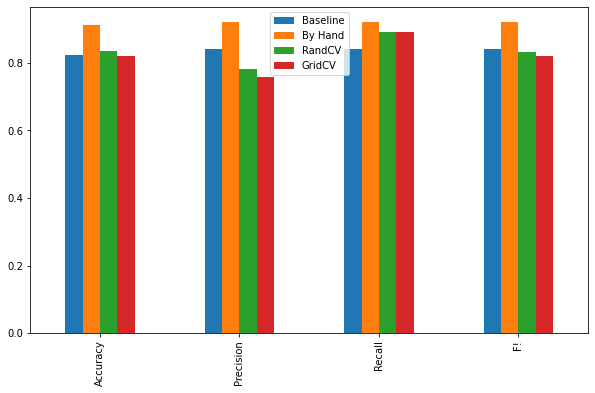

In [211]:
# lets see this visually
score_df = pd.DataFrame({
                        "Baseline": base_scores,
                        "By Hand": by_hand_scores,
                        "RandCV":randomized_cv_scores,
                        "GridCV":grid_cv_scores})

# lets plot this
score_df.plot.bar(figsize=(10,6));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:

* With Python's `pickle` module
* With the `joblib` module

__Pickle__

In [233]:
# lets import pickle
import pickle

# pickle help us to bundle our python objects to binary executables we can use over and over

# In here our model is a python object


# Save using pickle
# lets save our baseline model
pickle.dump(clf_base, open("./models/heart_disease_classifier.pkl","wb"))

# if you encounter a error from running after cloning from Github, Make sure create a 'models' folder and run from this cell

In [218]:
# Now lets load that model


pickled_model = pickle.load(open("./models/heart_disease_classifier.pkl","rb"))

In [224]:
# lets get prediction values
y_pred_pickle = pickled_model.predict(X_valid)


In [225]:
# Compare them
get_classification_scores(y_valid,y_pred_pickle);

Accuracy Score : 0.82
Precision Score : 0.84
Recall Score : 0.84
F1 Score : 0.84


In [222]:
base_scores

{'Accuracy': 0.8222222222222222,
 'Precision': 0.84,
 'Recall': 0.84,
 'F!': 0.8399999999999999}

In [226]:
# Boom Same so it works

__Joblib__

If what we are working with is huge number of sample its better to use joblib rather than pickle.

In [229]:
from joblib import load,dump

# lets save
dump(clf_base,'./models/heart_disease_classifier.joblib');

In [230]:
# now that its saved we can see it

# lets load and check

joblibbed_model = load('./models/heart_disease_classifier.joblib')

In [231]:
y_pred_joblibbed = joblibbed_model.predict(X_valid)

# get scores
get_classification_scores(y_valid,y_pred_joblibbed)

Accuracy Score : 0.82
Precision Score : 0.84
Recall Score : 0.84
F1 Score : 0.84


{'Accuracy': 0.8222222222222222,
 'Precision': 0.84,
 'Recall': 0.84,
 'F!': 0.8399999999999999}

In [232]:
# noice it works

### 8. Putting it all together

In [237]:
# Okay now for the moment of truth, Lets do everything we lear so far and and create a regression model

# We will use pipeline offered in scikitlearning, Note that you can do this without this as well, No worries

# importing Things

# general imports
import pandas as pd
import sklearn
import numpy as np

# for pre processing
from sklearn.compose import ColumnTransformer # to transform columns
from sklearn.model_selection import train_test_split # to split the data
from sklearn.impute import SimpleImputer # to fill values
from sklearn.preprocessing import OneHotEncoder # turn categorical data into numerical

# To create the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# first of all lets set a global random seed before forgetting
np.random.seed(42)

# okay lets import dataset
data_df = pd.read_csv('./data/car-sales-extended-missing-data.csv')

# check the data
data_df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [238]:
#check infor
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [261]:
# okay we need to drop data with missing price and fill some missing data

# droping entries without price
data_df.dropna(subset=['Price'], inplace=True)

# Creating transformer for each feature what we want to do
categorical_features = ['Make','Colour']
categorical_transformer = Pipeline(
    steps=[
        ('impute',SimpleImputer(strategy='constant',fill_value='Missing')),
        ('onehot',OneHotEncoder(handle_unknown='ignore'))
    ])

# what this does is when categorical transformer is called it will run the steps as metioned with the information passed

doors_feature = ['Doors']
doors_transformer = Pipeline(steps=[
        ('impute',SimpleImputer(strategy='constant', fill_value=4))
])

numerical_feature = ['Odometer (KM)']
numerical_transformer = Pipeline(steps=[
        ('impute',SimpleImputer(strategy='mean'))
])


# now we have to create a preprocessor column transfomer to run these
preprocessor = ColumnTransformer(transformers=[
        ('cat',categorical_transformer,categorical_features), # this says to run the categorical transformer on the metioned features and since categorical trasformer is a pipeline it will run the metioned two steps as welll */
        ('doors',doors_transformer,doors_feature),
        ('num',numerical_transformer, numerical_feature)
],remainder='passthrough')

# ========================================================================================================================
# to get an idea how the pipeline works andget shit done run these codes so you can see how X get filled
#X = data_df.drop('Price',axis=1)
#y = data_df['Price']
#X.isna().sum() # X has some missing values
#y.isna().sum() # y does not have any
#X_processed = preprocessor.fit_transform(X);

# you know what lets check if this has worked
#X_processed_df =pd.DataFrame(X_processed)
#X_processed_df.info()
#X_processed_df.head()

#===========================================================================================================================

# create a pipeline to run the preprocessing steps and model instantiation steps
model = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('model',RandomForestRegressor())
])


model
# you can see the whole pipline and how it connects by below diagram

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('doors',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                                                  ['Doors']),
                                                 ('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  ['Odometer (KM)'])])),
                ('model', RandomForestRegressor())])

Read this article about `sklearn.pipeline.Pipeline` <a href='https://towardsdatascience.com/getting-the-most-out-of-scikit-learn-pipelines-c2afc4410f1a'>here</a>

In [262]:
# Okay now model is set all we have to do is split our data

# here we still have the data_df data frame which has not edited yet because we have not run the pipeline
# pipeline has given the model we have to fit the model in order to whole pipleline to get executed

# However dataframe does not incluede any missing price values entries because we remove them at the begining
X = data_df.drop('Price',axis=1)
y = data_df['Price']

# lets split the data
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

model.fit(X=X_train,y=y_train) # this will trigger the above pipeline and start doing preprocessor things and so on and so forth

# now lets see the score
model.score(X_test,y_test)

0.22027638379177727

It's also possible to use `GridSearchCV` or `RandomizedSesrchCV` with our `Pipeline`.

In [264]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

# unlike in the normal grid naming convention should be like this
pipe_grid = {
    # this is regarding the preprocessor
    "preprocessor__num__impute__strategy": ["mean", "median"], # so what we are doing is changing the imputer strategy for numerical missing values
    # these are hyper parameters for estimator
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]    
}

# this thing is kind of confusing but do not worry you'll get it... Gambare
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.3s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.2s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   2.4s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   2.3s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   2.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   2.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   2.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   2.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   2.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   2.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   2.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   2.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.8s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.8s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.8s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.8s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.9s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   2.0s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   2.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   1.9s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   1.9s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   2.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.4s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.3s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.4s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.4s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.4s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   1.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   1.5s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   1.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   1.9s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   1.6s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=mean; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__impute__strategy=median; total time=   0.1s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.4s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.4s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.6s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=mean; total time=   1.5s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   1.4s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   1.4s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   1.5s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   1.4s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__impute__strategy=median; total time=   1.4s


D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(fill_value='Missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('doors',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__impute__strategy': ['mean',
                                                                 'median']},
             verbose=2)

In [265]:
# after the this is run we can check
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'auto',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__num__impute__strategy': 'mean'}

In [266]:
# Lets see the new score
gs_model.score(X_test, y_test)

0.33242858957157273